In [1]:
from indoxGen.synthCore import TabularGANConfig,TabularGANTrainer

In [2]:
import pandas as pd
data = pd.read_csv("data/Adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [4]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [5]:
# Set up the configuration
config = TabularGANConfig(
    input_dim=200,  # Noise dimension
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=50,
    n_critic=5
)

# Initialize the trainer with the config and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the model
history = trainer.train(data, patience=15)


Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 149s 163ms/step - d_loss: 1.3128 - g_loss: -0.2790 - learning_rate: 0.0010
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 56s 147ms/step - d_loss: -2.0201 - g_loss: 1.0878 - learning_rate: 0.0010
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 52s 137ms/step - d_loss: -1.1967 - g_loss: 1.2055 - learning_rate: 0.0010
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - d_loss: -0.5500 - g_loss: 0.8103 - learning_rate: 0.0010
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - d_loss: -0.5556 - g_loss: 1.3947 - learning_rate: 0.0010
Epoch 6/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - d_loss: -0.6209 - g_loss: 1.8348 - learning_rate: 0.0010
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - d_loss: -0.7109 - g_loss: 2.2335 - learning_rate: 0.0010
Epoch 8/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - d_loss: -0.7645 - g_loss: 2.4728 - learning_rate: 0.0010
Epoch 9/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 61s 159ms/step - d_loss: -0.7937 - g_loss: 2.78

In [6]:
# Optionally generate synthetic data
synthetic_data = trainer.generate_samples(50000)

In [7]:
synthetic_data['income'].value_counts()

income
0    37613
1    12387
Name: count, dtype: int64

In [7]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,84758,15,4,1,3,4,0,5,22,36,39,0
1,52,6,84475,15,2,5,0,4,1,6139,178,50,39,1
2,37,4,202689,11,2,3,0,4,1,1086,0,48,39,0
3,44,2,295157,11,2,10,1,4,0,0,20,33,39,0
4,49,4,241918,15,2,5,0,4,1,1309,0,43,39,1


In [8]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [9]:
data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.239282
std,13.710510,1.464234,1.056040e+05,3.874492,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [10]:
synthetic_data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.872000,4.091000,183826.485000,11.952000,2.462000,5.081000,1.273000,3.822000,0.68300,801.051000,53.360000,40.302000,38.583000,0.222000
std,11.263947,0.958978,90026.719765,2.123253,1.353657,4.219033,1.510216,0.569772,0.46554,1726.860738,117.354329,8.089761,3.366072,0.415799
min,25.000000,0.000000,84061.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,26.000000,4.000000,88245.250000,11.000000,2.000000,3.000000,0.000000,4.000000,0.00000,0.000000,0.000000,33.000000,39.000000,0.000000
50%,36.500000,4.000000,166627.500000,11.000000,2.000000,3.000000,1.000000,4.000000,1.00000,107.000000,11.000000,40.000000,39.000000,0.000000
75%,51.000000,4.000000,290305.000000,15.000000,4.000000,10.000000,3.000000,4.000000,1.00000,553.500000,29.250000,48.000000,39.000000,0.000000
max,52.000000,7.000000,295267.000000,15.000000,4.000000,12.000000,5.000000,4.000000,1.00000,8528.000000,490.000000,53.000000,39.000000,1.000000


In [11]:
history = trainer.get_training_history()

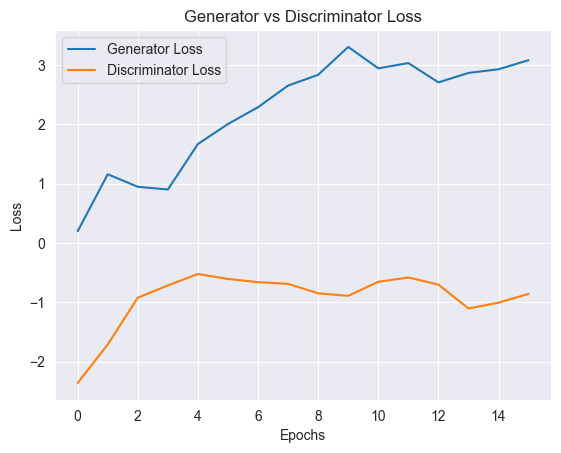

In [12]:
import matplotlib.pyplot as plt

# Extract loss history from the training process
generator_loss = history.history['g_loss']
discriminator_loss = history.history['d_loss']

# Plot the loss curves
plt.plot(generator_loss, label='Generator Loss')
plt.plot(discriminator_loss, label='Discriminator Loss')
plt.title('Generator vs Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


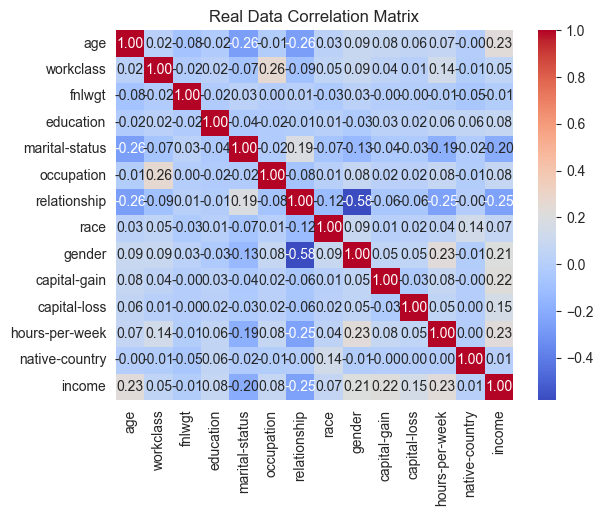

<Axes: >

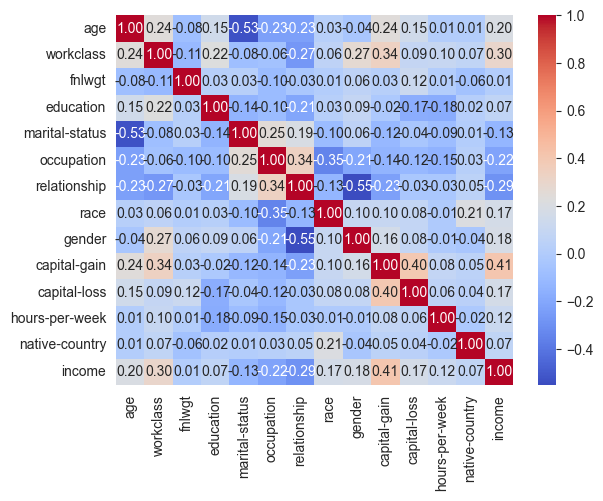

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and round correlation matrices to 2 decimal places
real_corr = data.corr().round(2)
synthetic_corr = synthetic_data.corr().round(2)

# Plot heatmap for real data
sns.heatmap(real_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2f' ensures 2 decimal places
plt.title('Real Data Correlation Matrix')
plt.show()

# Plot heatmap for synthetic data
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', fmt='.2f')  # fmt='.2


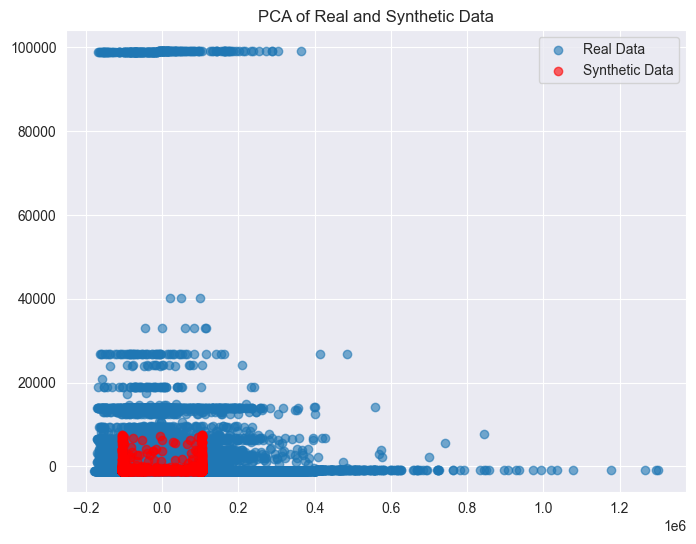

In [14]:
from sklearn.decomposition import PCA

# Combine real and synthetic data for PCA
combined_data = pd.concat([data, synthetic_data])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:len(data), 0], pca_result[:len(data), 1], label="Real Data", alpha=0.6)
plt.scatter(pca_result[len(data):, 0], pca_result[len(data):, 1], label="Synthetic Data", alpha=0.6, color='red')
plt.title('PCA of Real and Synthetic Data')
plt.legend()
plt.show()


In [8]:
from indoxGen.synthCore import train_and_evaluate_classifier, evaluate_utility, evaluate_statistical_similarity, evaluate_privacy, evaluate_data_drift, plot_distributions



Utility Metrics Comparison (Real vs. Synthetic):

Classifier: LOGISTICREGRESSION
Accuracy: Real = 80.45, Synthetic = 71.94, Difference = 8.51
AUC: Real = 0.82, Synthetic = 0.61, Difference = 0.20
F1 Score: Real = 0.65, Synthetic = 0.58, Difference = 0.08

Classifier: DECISIONTREE
Accuracy: Real = 81.29, Synthetic = 71.94, Difference = 9.35
AUC: Real = 0.75, Synthetic = 0.61, Difference = 0.14
F1 Score: Real = 0.75, Synthetic = 0.58, Difference = 0.17

Classifier: RANDOMFOREST
Accuracy: Real = 86.24, Synthetic = 71.94, Difference = 14.30
AUC: Real = 0.91, Synthetic = 0.61, Difference = 0.30
F1 Score: Real = 0.80, Synthetic = 0.58, Difference = 0.22

Classifier: MULTILAYERPERCEPTRON
Accuracy: Real = 83.86, Synthetic = 71.94, Difference = 11.92
AUC: Real = 0.89, Synthetic = 0.61, Difference = 0.28
F1 Score: Real = 0.76, Synthetic = 0.58, Difference = 0.19

Statistical Similarity Metrics:
Average Wasserstein Distance (Continuous Columns): 0.0378
Average Jensen-Shannon Divergence (Categori

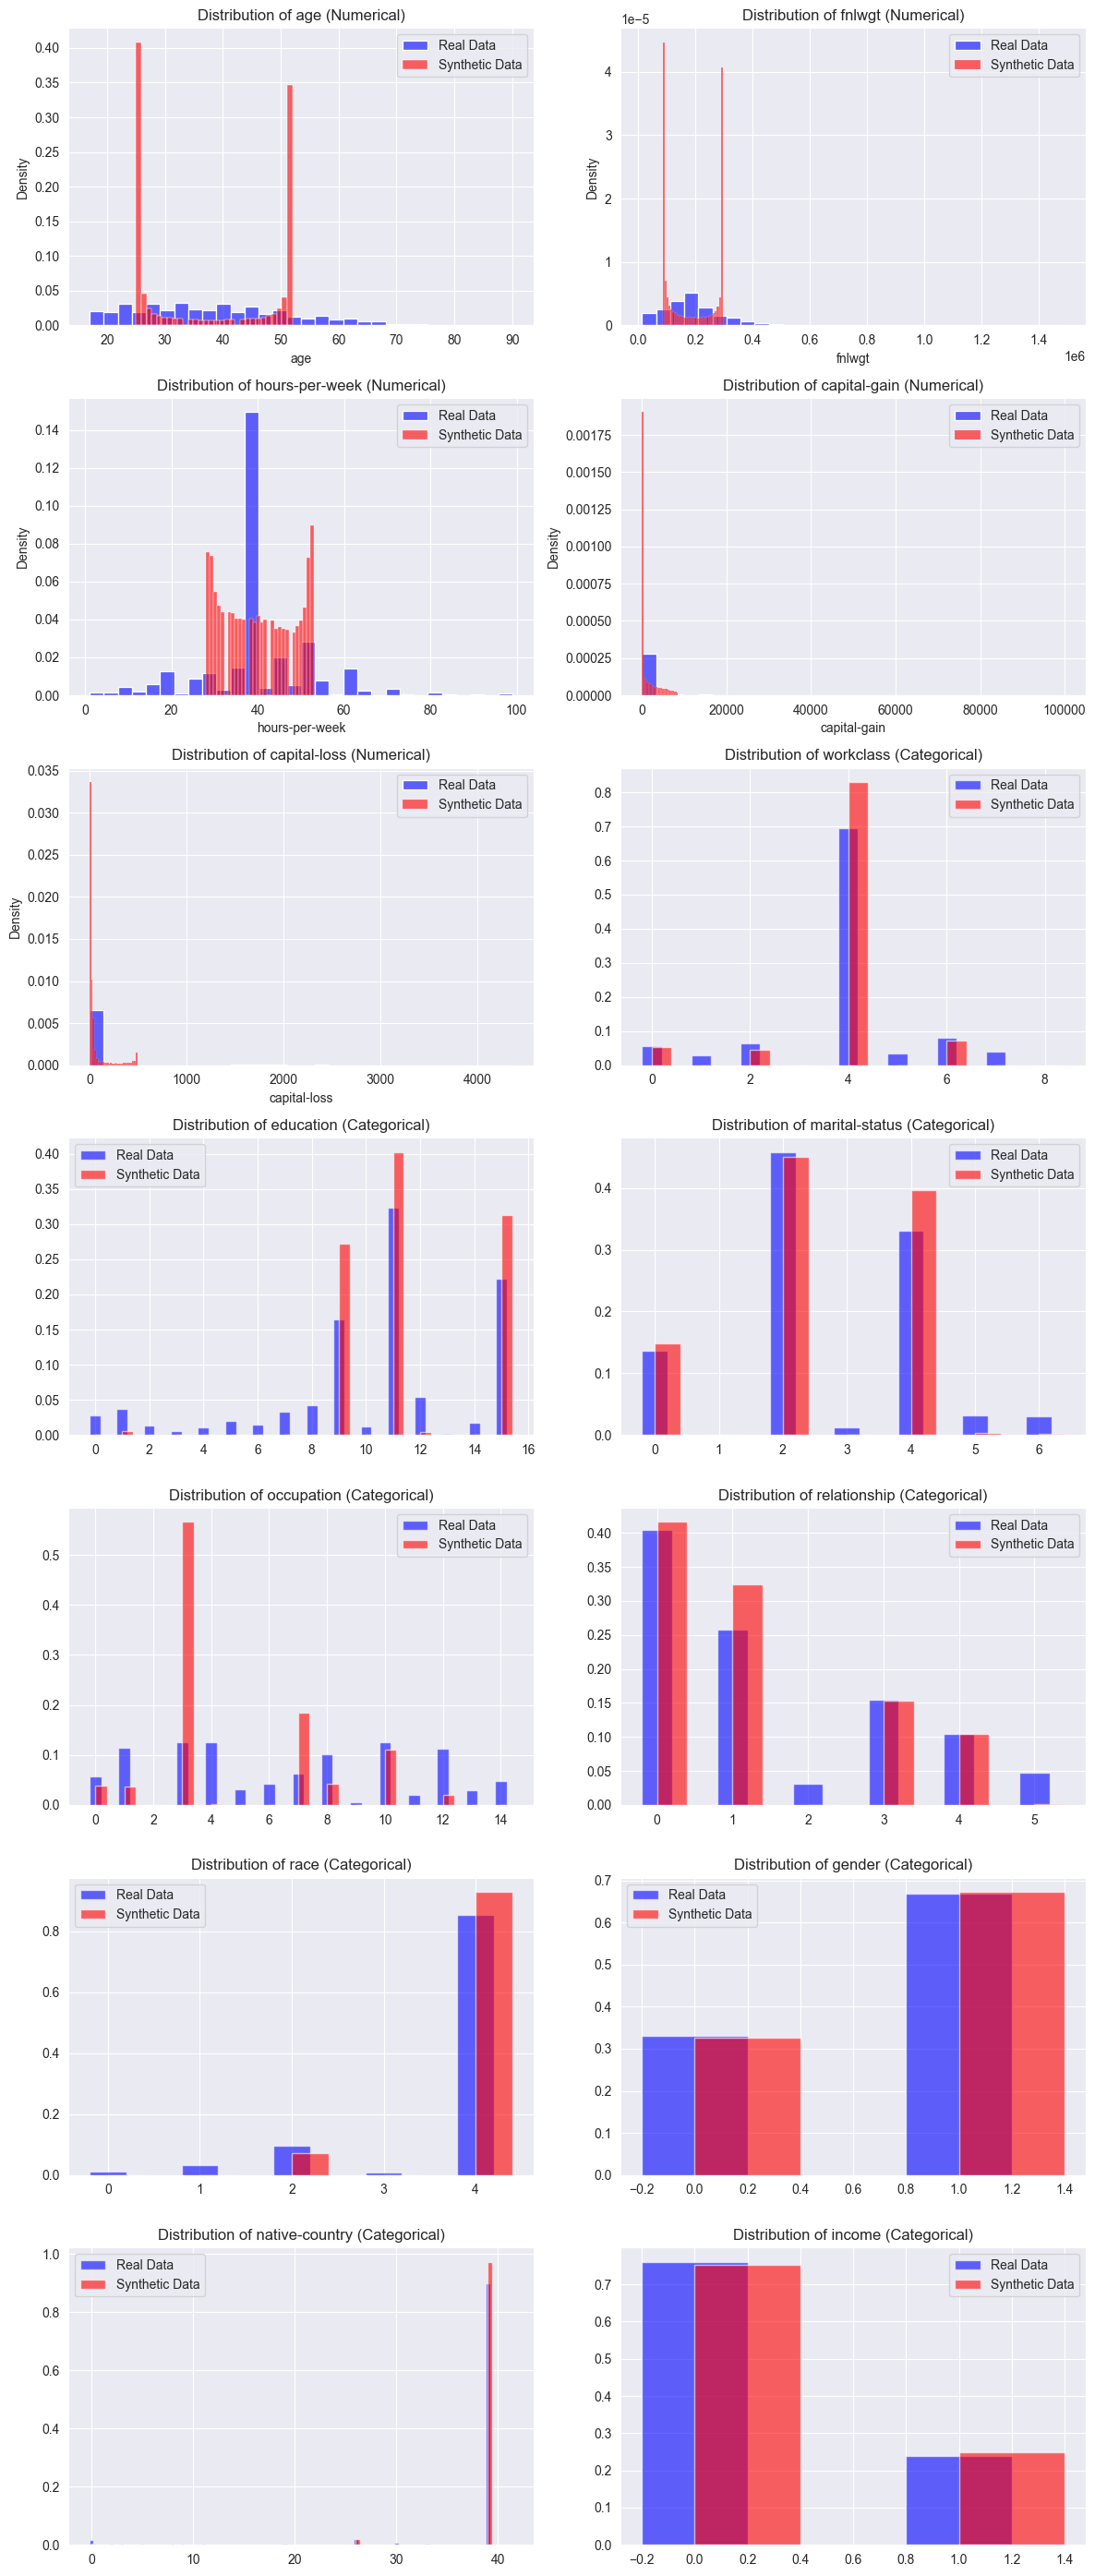

In [9]:
# Example Usage

# 1. Evaluate Utility
evaluate_utility(data, synthetic_data, classifiers=["LogisticRegression", "DecisionTree", "RandomForest", "MultiLayerPerceptron"])

# 2. Evaluate Statistical Similarity
evaluate_statistical_similarity(data, synthetic_data, cat_cols=categorical_columns)

# 3. Evaluate Privacy
evaluate_privacy(data, synthetic_data)

# 4. Evaluate Data Drift
drift_results = evaluate_data_drift(data, synthetic_data, categorical_columns, integer_columns)
print(drift_results)

# 5. Visualize Distributions
plot_distributions(data, synthetic_data, categorical_columns, integer_columns)